In [1]:
import pandas as pd
#from dataenforce import Dataset
#DMarket_insight = Dataset["id", "date", ...]
data = pd.read_csv("../datasets/raw/market_insights_overview_all_2021_11_12.csv")
data["date"] = pd.to_datetime(data["date"])


In [2]:
from matplotlib import pyplot as plt

In [3]:
from utils import save_fig_for_raport
print(plt.style.available)
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use("seaborn")
plt.rcParams['font.size'] = '16'
# mpl_style()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:

from utils import dataframe_to_latex_tabular

In [5]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35966868 entries, 0 to 35966867
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   product_id       int64         
 2   manufacturer_id  int64         
 3   cat_id           int64         
 4   root_cat_id      int64         
 5   date             datetime64[ns]
 6   hits             int64         
 7   clicks           int64         
 8   last_modified    object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.4+ GB


In [6]:
categories = pd.read_csv("../datasets/raw/solr_categories_2021_11_29.csv")
categories.head()

parent     title_no internal_doc_type  \
0          Vannsport      Vannski          category   
1       Sportsutstyr    Vannsport          category   
2         Hagearbeid  Vannspreder          category   
3  Hansker og votter       Vanter          category   
4          Tilhenger   Varehenger          category   

                                           image_url    description  \
0  /3131/3131139/da3b0f02940b4bf2a6831a4a2113fdc7...    1 produkter   
1                 /1698/1698422/original.36x75!m.jpg  870 produkter   
2                /1705/1705821/original.132x75!m.jpg   35 produkter   
3                 /3071/3071632/original.68x75!m.jpg  758 produkter   
4                       /3154/3154296/i.192x75!m.jpg   99 produkter   

         title title_phonetic                      url        tags  \
0      Vannski        Vannski      /kategorier/vannski    products   
1    Vannsport      Vannsport    /kategorier/vannsport  categories   
2  Vannspreder    Vannspreder  /kategorier/vannspreder    products   
3       Vanter         Vanter       /kategorier/vanter      filter   
4   Varehenger     Varehenger   /kategorier/varehenger      filter   

                                                path  ...  internal_doc_id  \
0  Sport og friluftsliv>Sportsutstyr>Vannsport>Va...  ...            13053   
1        Sport og friluftsliv>Sportsutstyr>Vannsport  ...            10065   
2            Hage og utemiljø>Hagearbeid>Vannspreder  ...            11661   
3  Klær og sko>Accessories og tilbehør>Hansker og...  ...            12811   
4                     Bilutstyr>Tilhenger>Varehenger  ...            13209   

   popularity                  root      alias title_edge_ngram     id  \
0        1004  Sport og friluftsliv  water ski          Vannski  13053   
1        4000  Sport og friluftsliv        NaN        Vannsport  10065   
2        1046      Hage og utemiljø    spreder      Vannspreder  11661   
3        5897           Klær og sko        NaN           Vanter  12811   
4        1469             Bilutstyr        NaN       Varehenger  13209   

    alias_no  adult             last_modified  \
0  water ski  False  2021-11-29T04:01:40.783Z   
1        NaN  False  2021-11-29T04:01:40.783Z   
2    spreder  False  2021-11-29T04:01:40.783Z   
3        NaN  False  2021-11-29T04:01:40.783Z   
4        NaN  False  2021-11-29T04:01:40.783Z   

                                             parents  
0        Sport og friluftsliv,Sportsutstyr,Vannsport  
1                  Sport og friluftsliv,Sportsutstyr  
2                        Hage og utemiljø,Hagearbeid  
3  Klær og sko,Accessories og tilbehør,Hansker og...  
4                                Bilutstyr,Tilhenger  

[5 rows x 21 columns]

In [7]:
# Join market_insight table with category names
category_names = categories[[ "internal_doc_id", "title"]]
category_id_to_names_map = dict(map(lambda x: (x["internal_doc_id"], x["title"]), category_names.to_dict("records")))
category_name_to_id_map = dict(map(lambda x: (x["title"], x["internal_doc_id"]), category_names.to_dict("records")))

In [8]:
#print(category_names["title"])
#categories_file = open("categories.txt", "w")
#for cat_line in category_names["title"]:
#    categories_file.write(cat_line)
#    categories_file.write("\n")
#categories_file.close()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Set pandas to use decimal insteaf of scientific e^x notaion
pd.set_option("display.float_format", lambda x: "%.0f" % x)

interesting_data = data[["date", "hits", "clicks", "product_id", "cat_id"]]

print(f"Unique products: {data['product_id'].nunique()}")
print(f"Unique categories: {data['cat_id'].nunique()}")


grouped = interesting_data.groupby(["cat_id", "date"], as_index=False).sum()
# Filter away early 2018 data as it seems to contain errors
grouped = grouped.loc[grouped['date'] > '2018-12-01']

print(grouped)
grouped.describe()

Unique products: 310499
Unique categories: 1325
         cat_id       date  hits  clicks  product_id
120           2 2018-12-02  2450     301   293349707
121           2 2018-12-03  2889     418   324468137
122           2 2018-12-04  3048     413   319458697
123           2 2018-12-05  2777     381   305158187
124           2 2018-12-06  2882     363   292147192
...         ...        ...   ...     ...         ...
1078862   13771 2021-11-07     0       4     1061271
1078863   13771 2021-11-08    36       6     3164575
1078864   13771 2021-11-09    16       1     1572626
1078865   13771 2021-11-10    19      10     2103281
1078866   13771 2021-11-11    24       2     1572628

[1006910 rows x 5 columns]


cat_id    hits  clicks  product_id
count 1006910 1006910 1006910     1006910
mean    10450     128      32    11475671
std      3865     422     129    24455654
min         2       0       0        8791
25%     11205       9       2     1874971
50%     11656      29       7     4684672
75%     12086      95      24    11153683
max     13771   60601   53187  1514347598

In [10]:
# Join with category names
grouped_joined= pd.merge(grouped, category_names, how="left", left_on=["cat_id"], right_on=["internal_doc_id"])
grouped_joined.rename(columns={"title": "cat_name"}, inplace=True)
grouped_joined.drop(columns=["internal_doc_id"], inplace=True, axis=1)

In [11]:
dataframe_to_latex_tabular(
  grouped_joined.head().append({"cat_id": "...", "hits":"...", "date": "", "clicks":"...", "product_id": "...", "cat_name":"..."}, ignore_index=True).append(
    grouped_joined.tail()
  ),
  caption="Market Insights Overview dataset", 
  label="market_insights_overview_11-12-21")

C:\Users\Sander\AppData\Local\Temp\ipykernel_10344\244243946.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_joined.head().append({"cat_id": "...", "hits":"...", "date": "", "clicks":"...", "product_id": "...", "cat_name":"..."}, ignore_index=True).append(
C:\Users\Sander\AppData\Local\Temp\ipykernel_10344\244243946.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_joined.head().append({"cat_id": "...", "hits":"...", "date": "", "clicks":"...", "product_id": "...", "cat_name":"..."}, ignore_index=True).append(
C:\Users\Sander\Documents\School\Masteroppgave\notebooks\utils.py:40: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommend

In [12]:

# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix)
data_by_cat_id = grouped_joined.pivot(index=["date"], columns=["cat_id", "cat_name"])["hits"]
data_by_cat_id.tail()

cat_id         2               5             6               9         10     \
cat_name   Bærbar PC Prosessor (CPU) Digitalkamera Harddisk og SSD Hovedkort   
date                                                                           
2021-11-07         0               0             0               0         0   
2021-11-08      1833             697           110             790       262   
2021-11-09      1980             602           120             819       316   
2021-11-10      2018             645           135             665       356   
2021-11-11      3241             711           135             904       464   

cat_id            11       13             14             15     \
cat_name   PC-høyttaler Kabinett Kontrollerkort Minnekortleser   
date                                                             
2021-11-07            0        0            NaN            NaN   
2021-11-08           60      202              4            NaN   
2021-11-09           51      209             11              2   
2021-11-10           61      292            NaN              1   
2021-11-11           82      341             10              5   

cat_id               16     ...       13748      13751      13758  \
cat_name   Diverse lydkort  ... Låssylinder Byggbeslag Dørstopper   
date                        ...                                     
2021-11-07               0  ...           0        NaN        NaN   
2021-11-08              19  ...           4        NaN        NaN   
2021-11-09              31  ...           5        NaN          1   
2021-11-10              34  ...         NaN        NaN          3   
2021-11-11              25  ...           3        NaN          2   

cat_id            13759      13764               13765       13767  \
cat_name   Toalettpapir Skytestokk Ladekabel til elbil Sykkelveske   
date                                                                 
2021-11-07            0          0                 NaN         NaN   
2021-11-08            7          7                   5           1   
2021-11-09            6         11                  10           1   
2021-11-10           12         11                  10           1   
2021-11-11            7          8                  17         NaN   

cat_id                    13769     13770                   13771  
cat_name   Overgangsko til barn Knivblokk Fuglemat og meiseboller  
date                                                               
2021-11-07                    0         0                       0  
2021-11-08                   17         2                      36  
2021-11-09                   13         1                      16  
2021-11-10                   12         2                      19  
2021-11-11                   17         2                      24  

[5 rows x 1325 columns]

In [13]:
import matplotlib.dates as mdate
date_locator = mdate.MonthLocator()
formatter = mdate.DateFormatter("%Y-%m")
all_categories = data["cat_id"].unique()

In [14]:
import numpy as np
import seaborn as sns

# Create a small sample of correlation matrix
import random
random.seed(41)
plt.rcParams['font.size'] = '10'
highest_cat_id = grouped_joined['cat_id'].max()
def list_of_random_categories(n):
    list = []
    for _ in range(n):
        list.append(grouped['cat_id'].unique()[random.randint(0, len(all_categories))])
    return list
sample_data_by_cat_id = data_by_cat_id[list_of_random_categories(10)]
sample_data_by_cat_id_corr = sample_data_by_cat_id.corr(min_periods=100)
plt.figure(figsize=(20,10))
sns.heatmap(sample_data_by_cat_id_corr, annot=True, fmt=".2f", square=True, cbar=True),
plt.show()

In [15]:
# Check the validity of the pivot table
grouped_joined[(grouped_joined['date'] == '2021-09-12') & (grouped_joined['cat_id'] == 13759)]
# Seems to check out

cat_id       date  hits  clicks  product_id      cat_name
1006685   13759 2021-09-12     0       1      522293  Toalettpapir

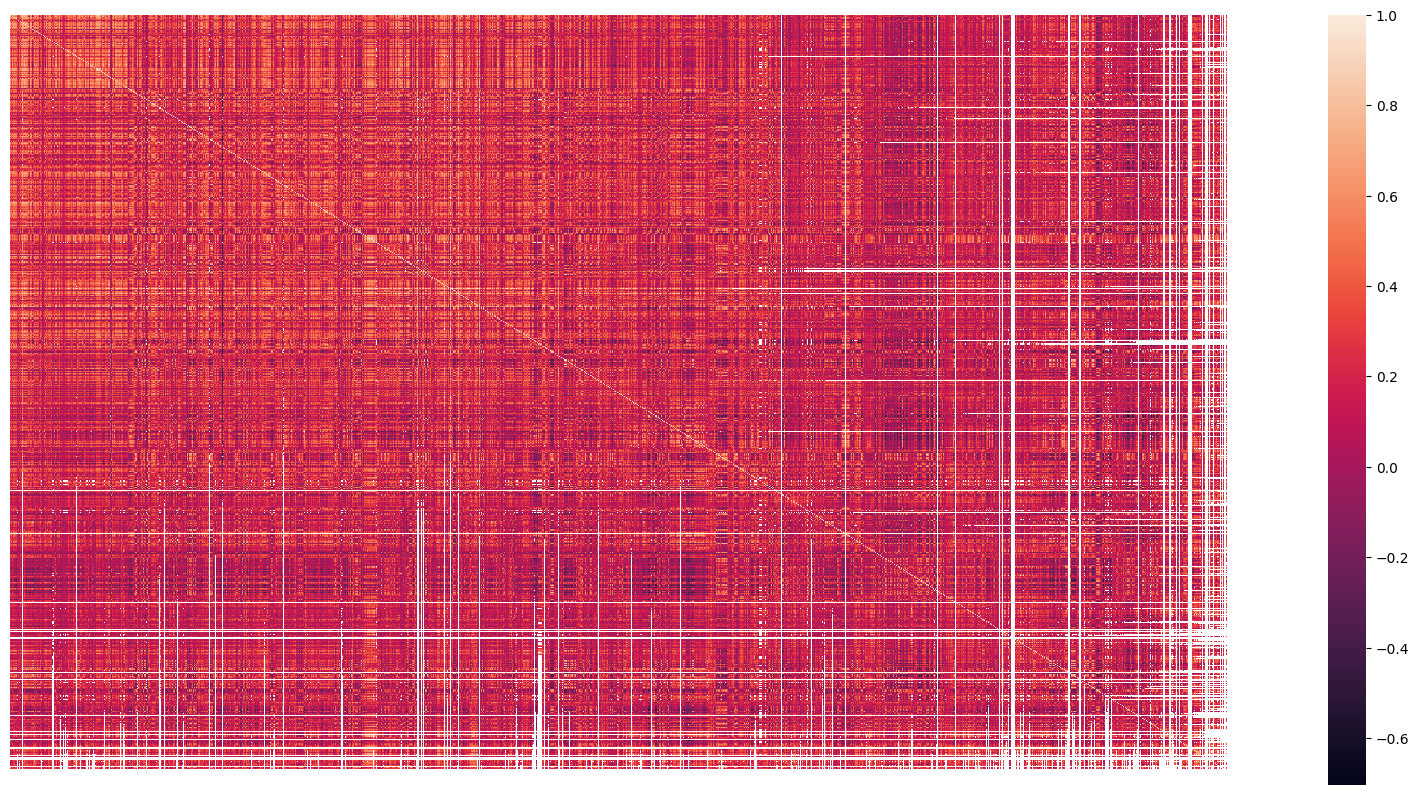

In [16]:
import seaborn as sns
# Require at least 200 observations for correlation to be valid
category_correlation = data_by_cat_id.corr(min_periods=100)
plt.figure(figsize=(20,10))
# Hide labels for easier reading
plt.axis('off')
sns.heatmap(category_correlation, xticklabels=False, yticklabels=False, cbar=True),
plt.show()

In [17]:
category_correlation

cat_id                             2               5             6      \
cat_name                       Bærbar PC Prosessor (CPU) Digitalkamera   
cat_id cat_name                                                          
2      Bærbar PC                       1               0             1   
5      Prosessor (CPU)                 0               1             0   
6      Digitalkamera                   1               0             1   
9      Harddisk og SSD                 1               1             0   
10     Hovedkort                       1               1             1   
...                                  ...             ...           ...   
13765  Ladekabel til elbil           NaN             NaN           NaN   
13767  Sykkelveske                   NaN             NaN           NaN   
13769  Overgangsko til barn          NaN             NaN           NaN   
13770  Knivblokk                     NaN             NaN           NaN   
13771  Fuglemat og meiseboller       NaN             NaN           NaN   

cat_id                                   9         10           11     \
cat_name                       Harddisk og SSD Hovedkort PC-høyttaler   
cat_id cat_name                                                         
2      Bærbar PC                             1         1            1   
5      Prosessor (CPU)                       1         1            0   
6      Digitalkamera                         0         1            1   
9      Harddisk og SSD                       1         1            1   
10     Hovedkort                             1         1            1   
...                                        ...       ...          ...   
13765  Ladekabel til elbil                 NaN       NaN          NaN   
13767  Sykkelveske                         NaN       NaN          NaN   
13769  Overgangsko til barn                NaN       NaN          NaN   
13770  Knivblokk                           NaN       NaN          NaN   
13771  Fuglemat og meiseboller             NaN       NaN          NaN   

cat_id                            13             14             15     \
cat_name                       Kabinett Kontrollerkort Minnekortleser   
cat_id cat_name                                                         
2      Bærbar PC                      1              0              0   
5      Prosessor (CPU)                1              0              0   
6      Digitalkamera                  0              0              0   
9      Harddisk og SSD                1              0              0   
10     Hovedkort                      1              0              0   
...                                 ...            ...            ...   
13765  Ladekabel til elbil          NaN            NaN            NaN   
13767  Sykkelveske                  NaN            NaN            NaN   
13769  Overgangsko til barn         NaN            NaN            NaN   
13770  Knivblokk                    NaN            NaN            NaN   
13771  Fuglemat og meiseboller      NaN            NaN            NaN   

cat_id                                   16     ...       13748      13751  \
cat_name                       Diverse lydkort  ... Låssylinder Byggbeslag   
cat_id cat_name                                 ...                          
2      Bærbar PC                             0  ...         NaN        NaN   
5      Prosessor (CPU)                       0  ...         NaN        NaN   
6      Digitalkamera                        -0  ...         NaN        NaN   
9      Harddisk og SSD                       0  ...         NaN        NaN   
10     Hovedkort                             0  ...         NaN        NaN   
...                                        ...  ...         ...        ...   
13765  Ladekabel til elbil                 NaN  ...         NaN        NaN   
13767  Sykkelveske                         NaN  ...         NaN        NaN   
13769  Overgangsko til barn                NaN  ...        

# Eval corr

In [83]:
# Remove all correlations under 0.5
category_correlation_filtered = category_correlation[((category_correlation >= .5)|(category_correlation <= -.5)) & (category_correlation != 1.00)]

In [84]:
category_correlation_filtered_half = category_correlation_filtered.iloc[:30,:30]

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(category_correlation_filtered_half, annot=True, fmt=".2f", square=True, cbar=True)
plt.show()

In [ ]:
category_correlation_filtered_half.columns

In [103]:
un_needed = [14,15,16,17,19,21,30,35,36,40]
#labels = [x for n,x in enumerate(list(category_correlation_filtered_half.columns())) if n in un_needed]
filtered = category_correlation_filtered_half.drop(category_correlation_filtered_half[un_needed], axis=1)
filtered = filtered.drop(un_needed)

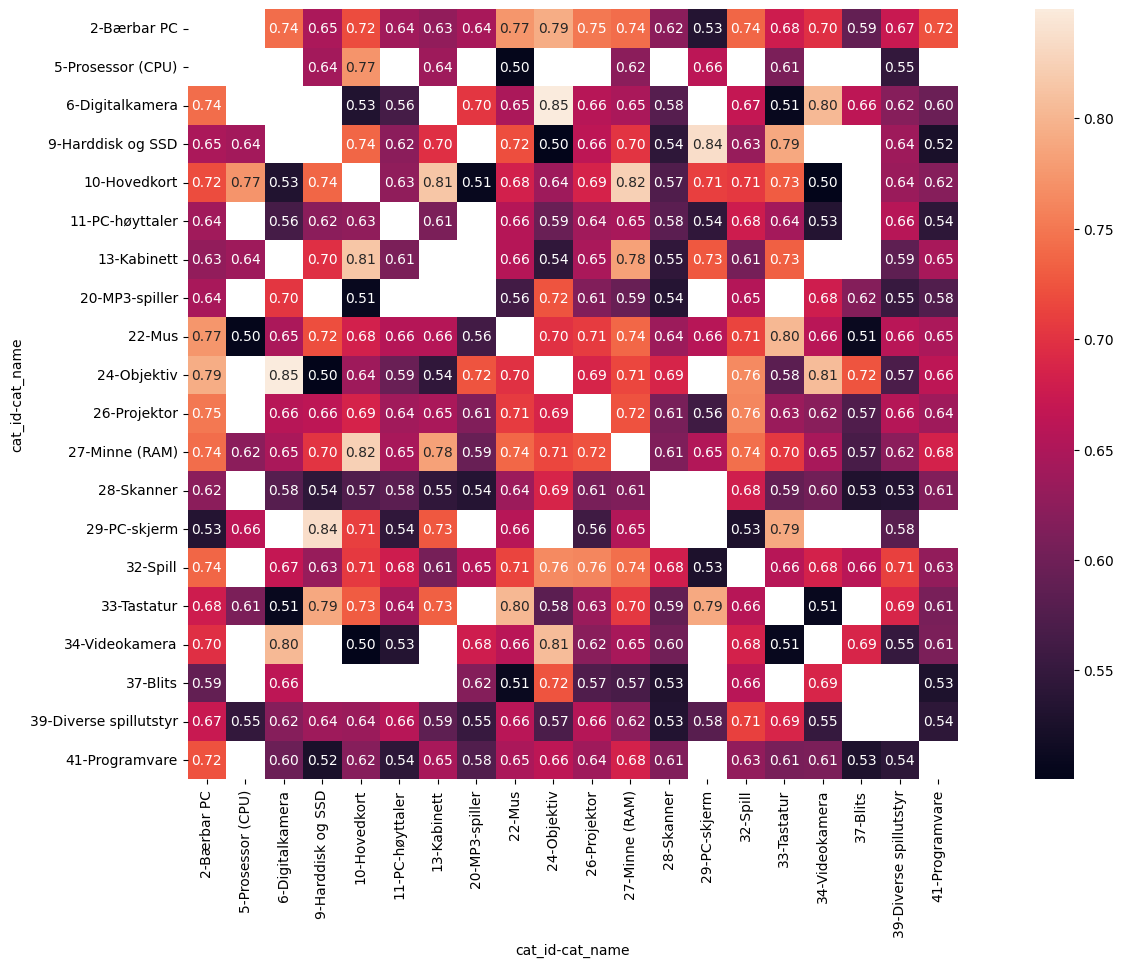

In [104]:
plt.figure(figsize=(20,10))
sns.heatmap(filtered, annot=True, fmt=".2f", square=True, cbar=True)
plt.show()

In [164]:
gb = grouped_joined.groupby("cat_id").count()
gb.filter(items=list(filtered.columns.get_level_values("cat_id")), axis=0)

date  hits  clicks  product_id  cat_name
cat_id                                          
2       1074  1074    1074        1074      1074
5       1074  1074    1074        1074      1074
6       1074  1074    1074        1074      1074
9       1074  1074    1074        1074      1074
10      1074  1074    1074        1074      1074
11      1074  1074    1074        1074      1074
13      1074  1074    1074        1074      1074
20      1073  1073    1073        1073      1073
22      1074  1074    1074        1074      1074
24      1074  1074    1074        1074      1074
26      1074  1074    1074        1074      1074
27      1074  1074    1074        1074      1074
28      1074  1074    1074        1074      1074
29      1074  1074    1074        1074      1074
32      1074  1074    1074        1074      1074
33      1074  1074    1074        1074      1074
34      1074  1074    1074        1074      1074
37      1054  1054    1054        1054      1054
39      1074  1074    1074        1074      1074
41      1074  1074    1074        1074      1074

In [171]:
grouped_joined.groupby("cat_id").count().filter(items=[21], axis=0)

date  hits  clicks  product_id  cat_name
cat_id                                          
21       218   218     218         218         0

# Eval no correlation

In [165]:
# Remove all correlations over 0.5
category_no_correlation_filtered = category_correlation[((category_correlation <= .3)&(category_correlation >= -.3)) & (category_correlation != 1.00)]

In [168]:
category_no_correlation_filtered_half = category_no_correlation_filtered.iloc[100:300,100:300]
#category_no_correlation_filtered_half = category_no_correlation_filtered_half.iloc[:30,:30]

In [169]:
plt.figure(figsize=(20,10))
sns.heatmap(category_no_correlation_filtered_half, xticklabels=False, yticklabels=False, cbar=True)
#sns.heatmap(category_no_correlation_filtered_half, annot=True, fmt=".2f", square=True, cbar=True)
plt.show()

In [138]:
un_needed = [12835,12838, 12906,12810,12887,12890, 12896]
#labels = [x for n,x in enumerate(list(category_correlation_filtered_half.columns())) if n in un_needed]
filtered_no_corr = category_no_correlation_filtered_half.drop(category_no_correlation_filtered_half[un_needed], axis=1)
filtered_no_corr = filtered_no_corr.drop(un_needed)

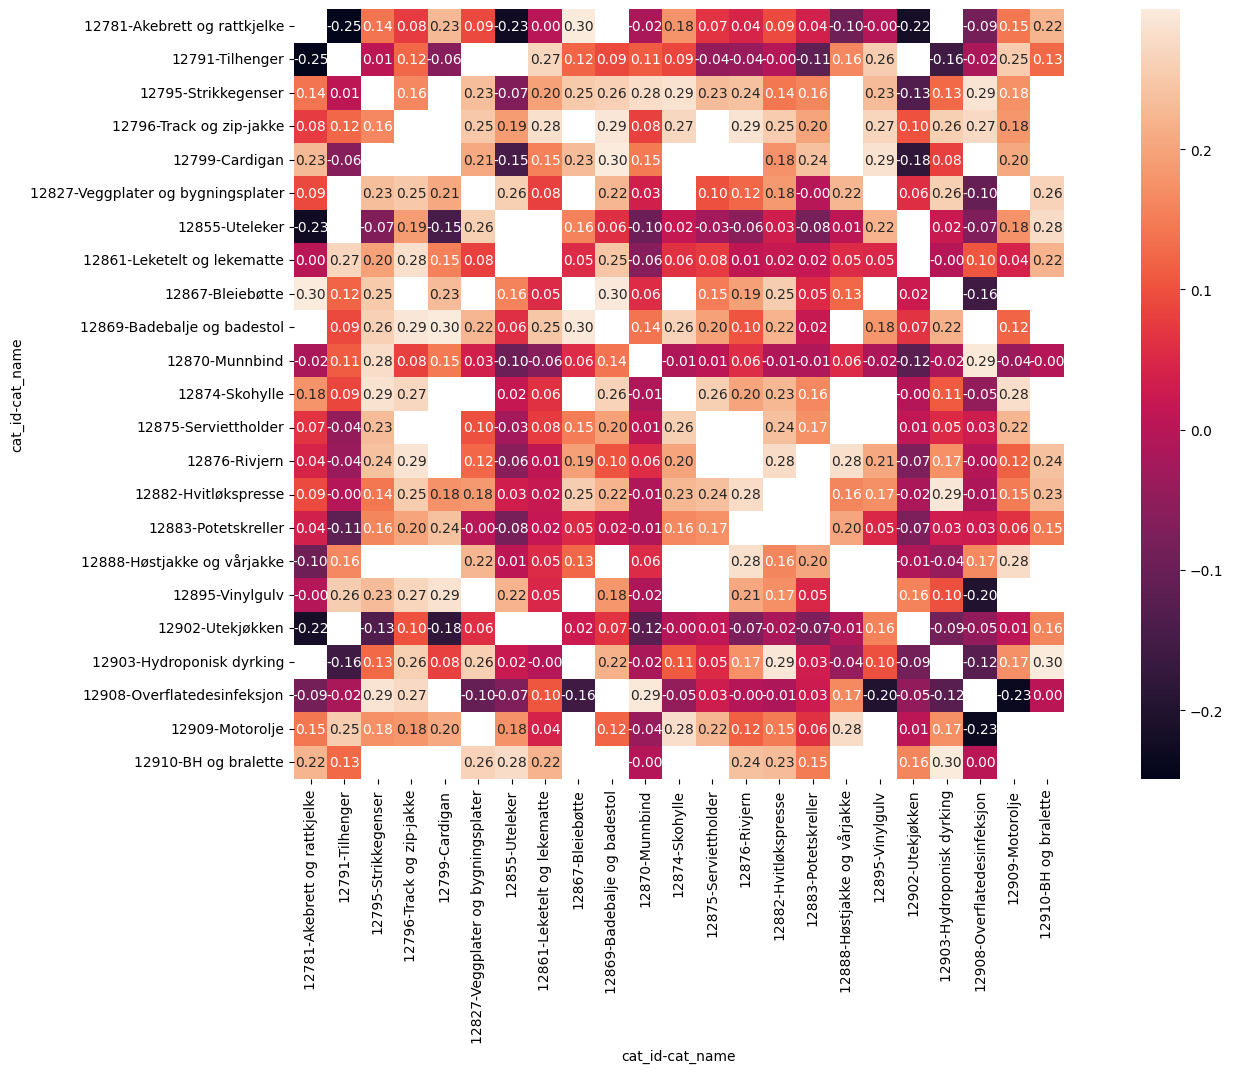

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(filtered_no_corr, annot=True, fmt=".2f", square=True, cbar=True)
plt.show()

In [162]:
gb = grouped_joined.groupby("cat_id").count()
gb.filter(items=list(filtered_no_corr.columns.get_level_values("cat_id")), axis=0)
#gb[gb["cat_id"] == list(filtered_no_corr.columns.get_level_values("cat_id"))]
# list(filtered_no_corr.columns.get_level_values("cat_id"))

date  hits  clicks  product_id  cat_name
cat_id                                          
12781    728   728     728         728       728
12791    706   706     706         706       706
12795    430   430     430         430       430
12796    419   419     419         419       419
12799    426   426     426         426       426
12827    701   701     701         701       701
12855    651   651     651         651       651
12861    652   652     652         652       652
12867    652   652     652         652       652
12869    646   646     646         646       646
12870    648   648     648         648       648
12874    639   639     639         639       639
12875    430   430     430         430       430
12876    611   611     611         611       611
12882    575   575     575         575       575
12883    511   511     511         511       511
12888    638   638     638         638       638
12895    634   634     634         634       634
12902    513   513     513         513       513
12903    625   625     625         625       625
12908    615   615     615         615       615
12909    612   612     612         612       612
12910    617   617     617         617       617

# 

# 

In [27]:
category_correlation.to_csv("../datasets/category_correlation.csv")

In [28]:
# Find number of correlations with bærbar-pc som ikke er 0 eller 1
pc_correlations = category_correlation[2].dropna()
print("Number of correlations with bærbar pc which is not 0 or 1: ",
  len(
  list(
    filter(lambda x: x != 0 and x != 1, 
       pc_correlations
      )
  )
))
print("Number of correlations with bærbar pc which is 1: ",list(filter(lambda x: x == 1, pc_correlations)))

Number of correlations with bærbar pc which is not 0 or 1:  1
Number of correlations with bærbar pc which is 1:  []


In [29]:
cpu_id = category_name_to_id_map['Prosessor (CPU)']
gpu_id = category_name_to_id_map['Grafikkort (GPU)']
cpu_gpu_correlation = data_by_cat_id.loc[:, [cpu_id, gpu_id]].corr()
print(cpu_gpu_correlation)
data_by_cat_id.loc[:, [cpu_id, gpu_id]]

cat_id                               5                30
cat_name                Prosessor (CPU) Grafikkort (GPU)
cat_id cat_name                                         
5      Prosessor (CPU)                1                0
30     Grafikkort (GPU)               0                1


cat_id                  5                30
cat_name   Prosessor (CPU) Grafikkort (GPU)
date                                       
2018-12-02             855             1414
2018-12-03             807             1726
2018-12-04             795             1629
2018-12-05             831             1681
2018-12-06             710             1550
...                    ...              ...
2021-11-07               0                0
2021-11-08             697             2881
2021-11-09             602             3531
2021-11-10             645             3119
2021-11-11             711             3741

[1074 rows x 2 columns]

Ser ikke ut som CPU eller GPU korrelerer i det hele tatt

Digitalkamera
Bærbar PC


IndexError: index 6 is out of bounds for axis 0 with size 2

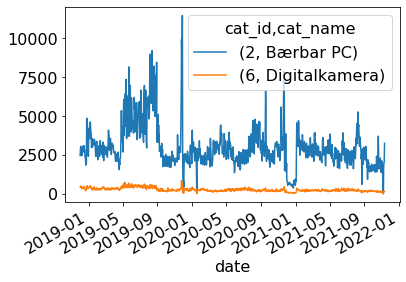

In [30]:
print(category_id_to_names_map[6])
print(category_id_to_names_map[2])
two_six = data_by_cat_id.loc[:, [2, 6]]
two_six.plot()
two_six.plot.scatter(x=6,y=2)
two_six_corr =two_six.corr()
print(two_six_corr)
two_six

Hvorfor korrelerer disse 100%?

Toalettpapir
Bærbar PC
cat_id  2      13759
cat_id              
2           1      0
13759       0      1


cat_id      2      13759
date                    
2018-12-02   2450    NaN
2018-12-03   2889    NaN
2018-12-04   3048    NaN
2018-12-05   2777    NaN
2018-12-06   2882    NaN
...           ...    ...
2021-11-07      0      0
2021-11-08   1833      7
2021-11-09   1980      6
2021-11-10   2018     12
2021-11-11   3241      7

[1074 rows x 2 columns]

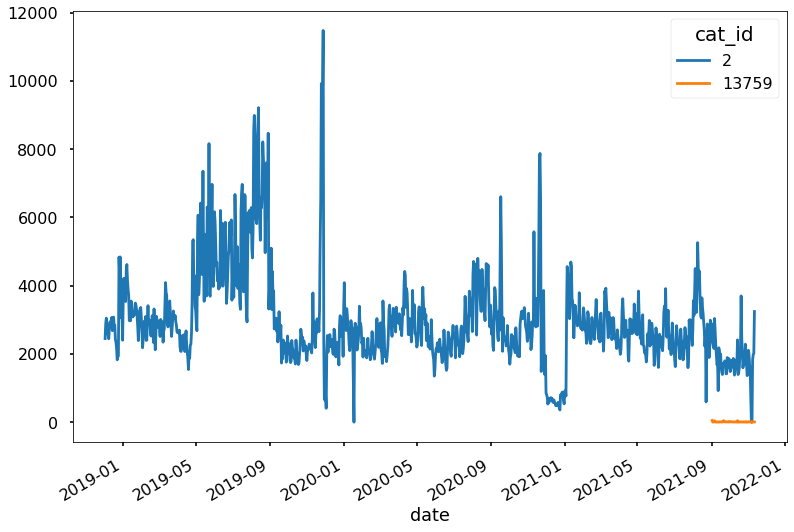

In [ ]:

print(category_id_to_names_map[13759])
print(category_id_to_names_map[2])
dopapir_pc = data_by_cat_id.loc[:, [2,  13759]]
dopapir_pc.plot()
dopapir_pc_corr = dopapir_pc.corr()
print(dopapir_pc_corr)
dopapir_pc

Ser ut som dopapir og PC kun korrelerer 100 % fordi dopapir er en ny kategori

In [ ]:
# Save some statistics for Mobiltelefon
dataframe_to_latex_tabular(
  grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']].drop("product_id", axis=1).describe(),
  caption="Mobiltelefon statistics",
  label="Mobiltelefon_statistics",
  add_index=True
)

## How many categories has 0 values in a given day?

cat_id
2           0
5           0
6           0
9           0
10          0
         ... 
13765    1029
13767    1059
13769    1051
13770    1060
13771    1066
Length: 1325, dtype: int64

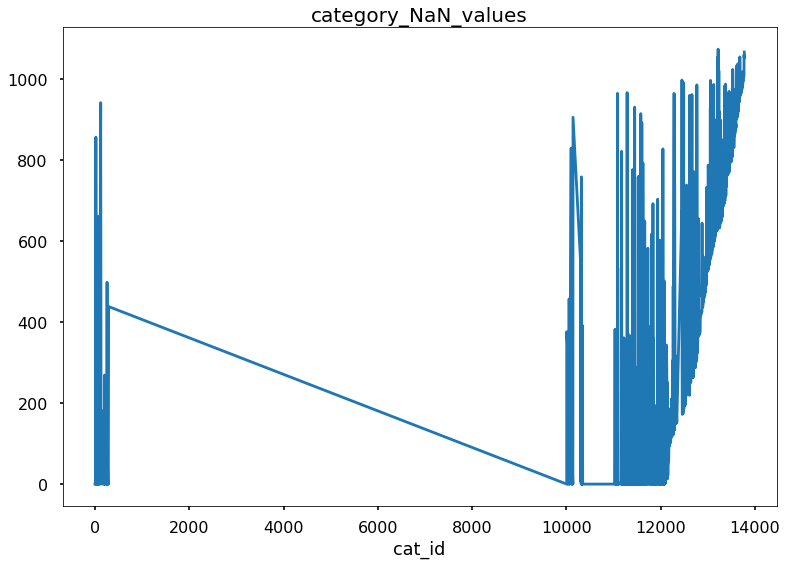

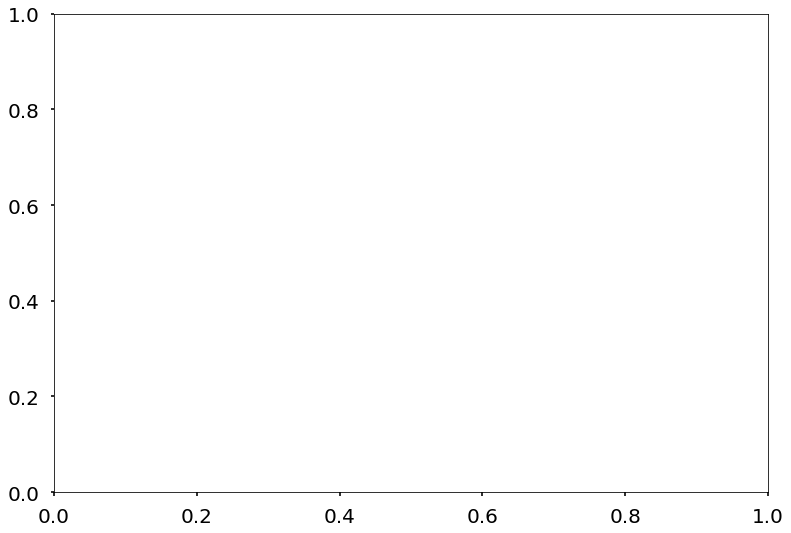

In [ ]:
save_fig_for_raport(
  data_by_cat_id.isna().sum().plot(),
  name="category_NaN_values"
)
data_by_cat_id.isna().sum()

cat_id
2        3
5        3
6        3
9        3
10       3
        ..
13765    1
13767    1
13769    2
13770    1
13771    2
Length: 1325, dtype: int64

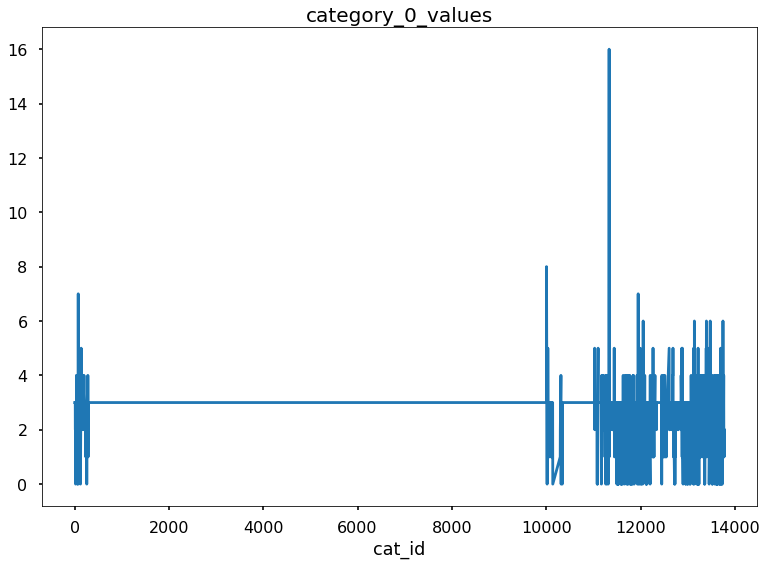

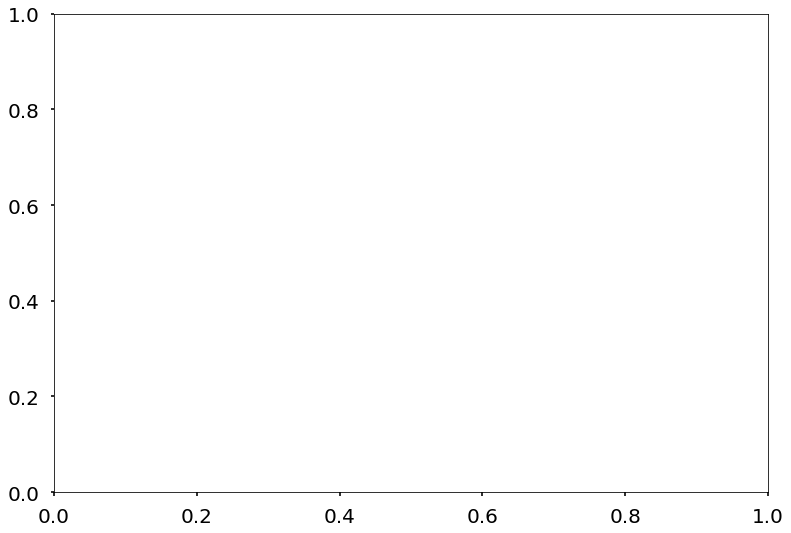

In [ ]:
save_fig_for_raport(
    data_by_cat_id.isin([0]).sum().plot(),
    name="category_0_values"
 )
data_by_cat_id.isin([0]).sum()

## Lag plot

resource: http://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm

In the graph below, firt axis represents the t(lag), seond axis represents t+1

Ex: if data is, [1,4,5,3,2], then y(t):= [1,4,5,3,2], y(t+1): = [4,5,3,2]

As we see the graph below, this suggests the non-random pattern (graph is poistively linear).

Non-randomness in the data reveals that we could use an autoregressive model

In [ ]:
from pandas.plotting import lag_plot

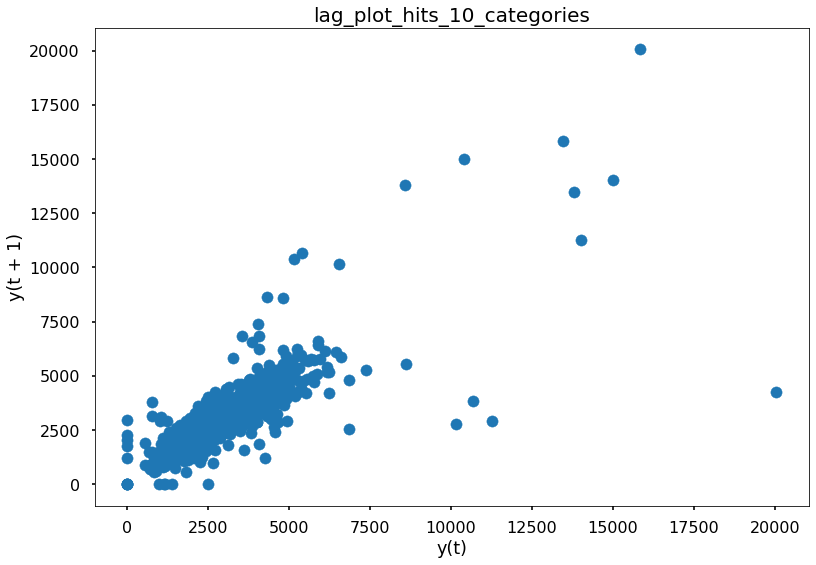

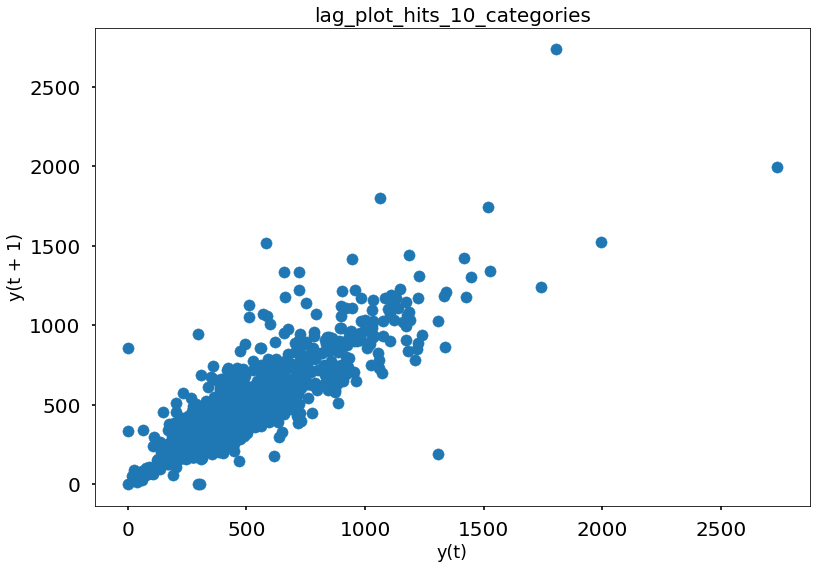

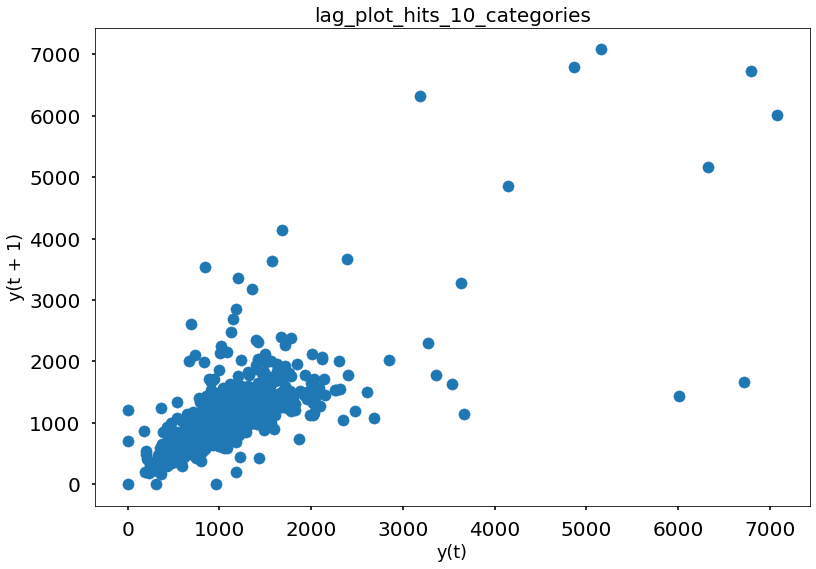

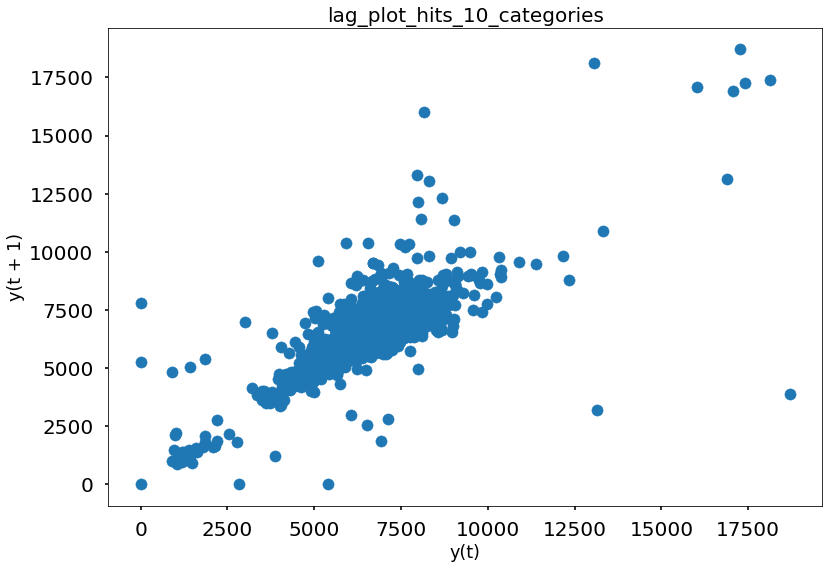

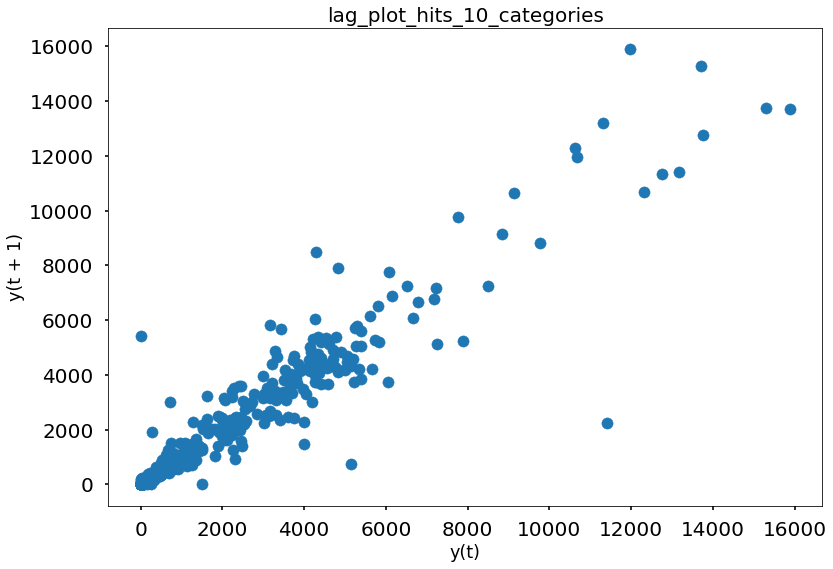

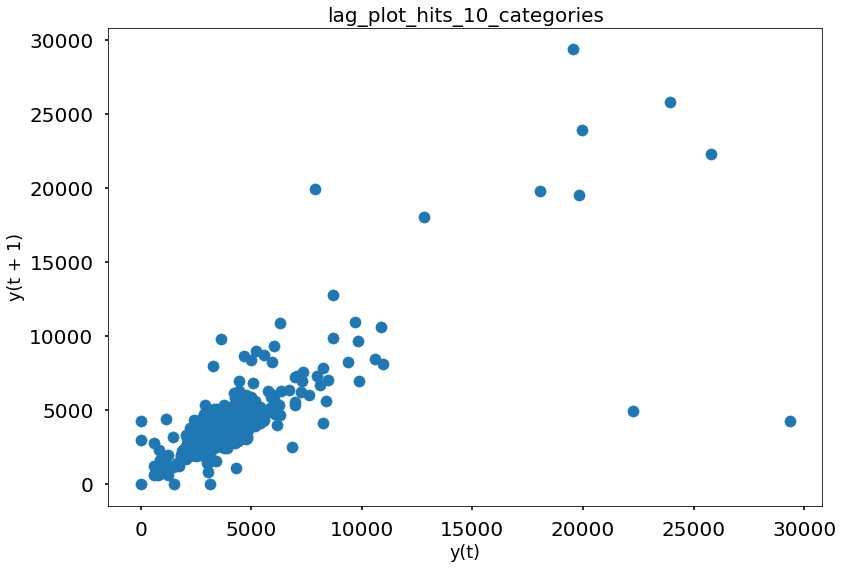

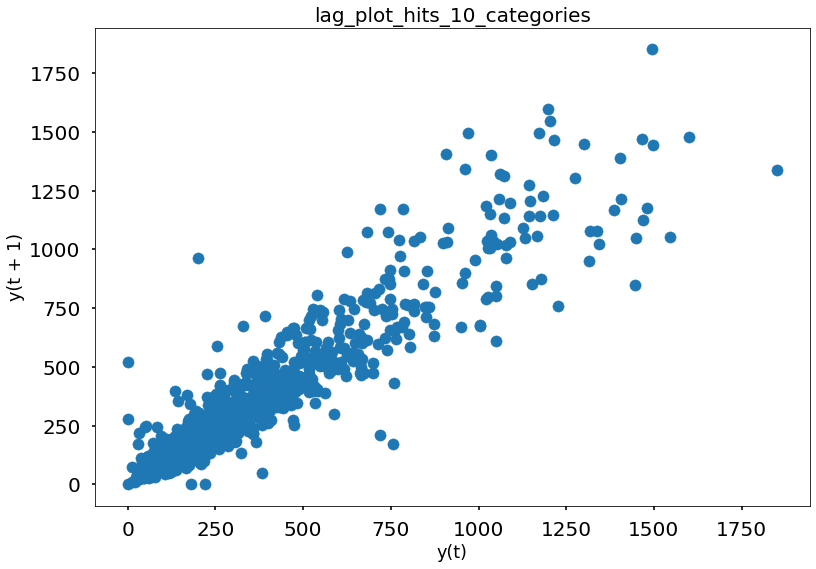

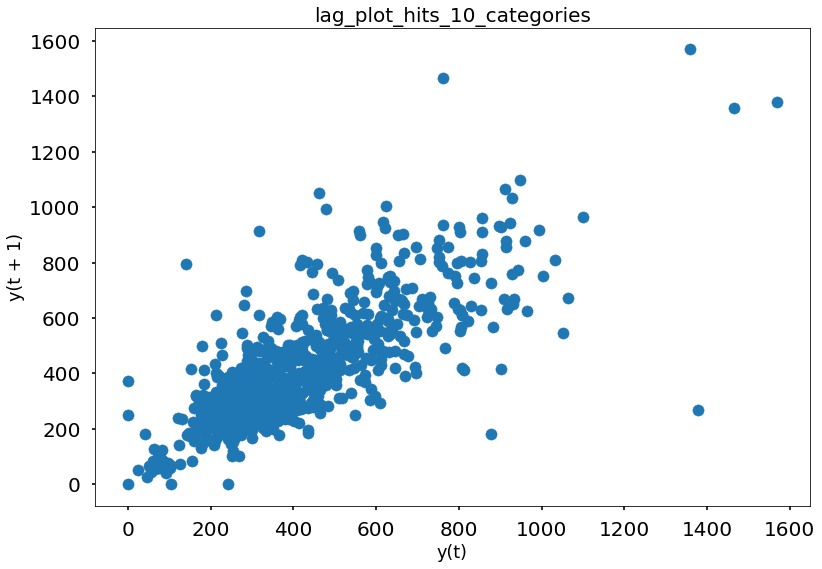

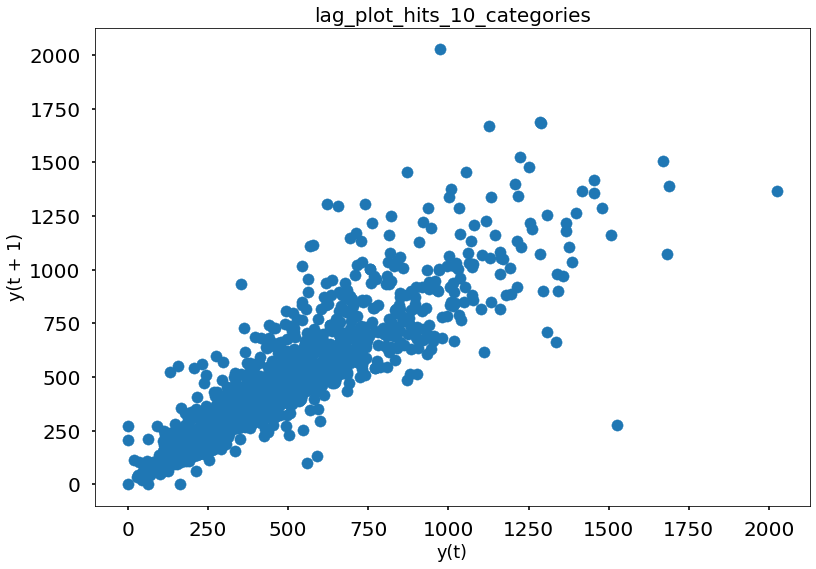

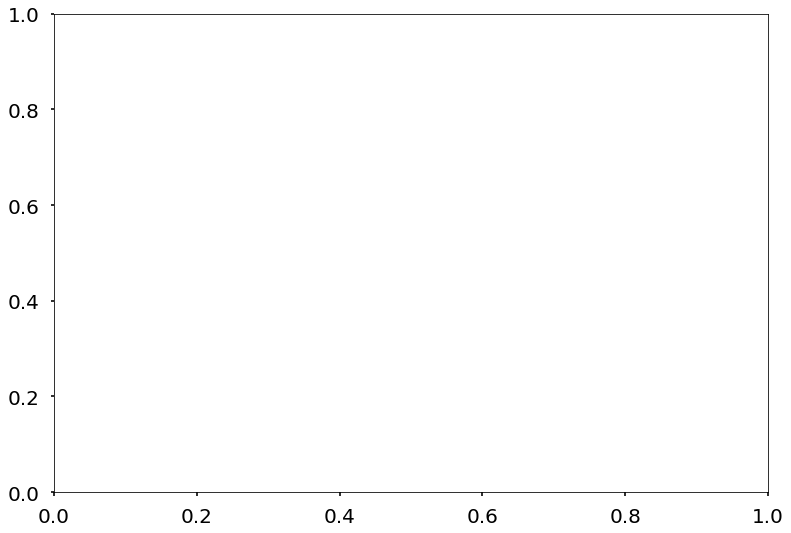

In [ ]:
lag_plot(grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["clicks"])
for cat_id in all_categories[:10]:
  save_fig_for_raport(
    lag_plot(grouped_joined[grouped_joined["cat_id"] == cat_id]["hits"]),
    name=f"lag_plot_hits_10_categories"
  )

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 7)'>

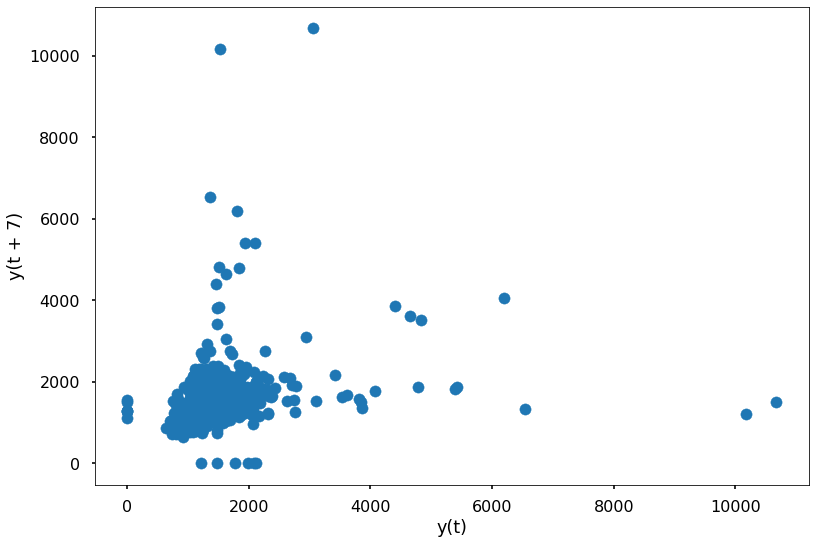

In [ ]:

lag_plot(
  grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["clicks"],
  lag=7
  )

https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

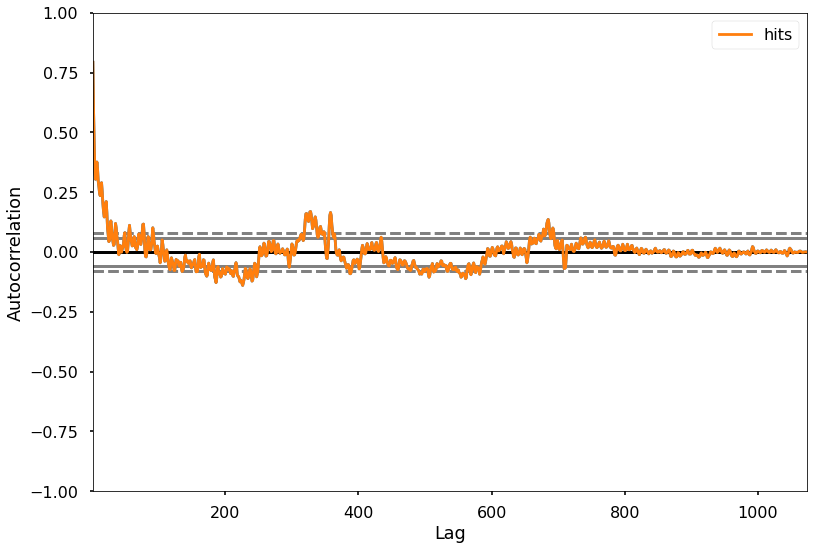

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["hits"])
autocorrelation_plot(grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["hits"], 
  label="hits",
  )

resource: http://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm

A lag plot above shows the structure in the data. In order to quantify the correlation between the point at t and point at t+1 withe respect to expectation, autocrrelation is used.

A black line in the graph below shows the expectation for random data(thus 0 correlation) and two dash lines above and below it represent the confidence interval with each 95% and 99%.

The graph shows a strong correlation for lags of < 100 days. (lag 0 is always 1 corrleation)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(
  grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["hits"],
  lags=7
  )

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:

analysis = grouped_joined[(grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']) & (grouped_joined["hits"] != 0)][["date", "hits"]].dropna()
analysis.set_index("date", inplace=True)
analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 2018-12-02 to 2021-11-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hits    1071 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose



decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period=7)
decompose_result_mult_year = seasonal_decompose(analysis, model="multiplicative", period=365)

# trend = decompose_result_mult.trend
# seasonal = decompose_result_mult.seasonal
# residual = decompose_result_mult.resid

decompose_result_mult.plot()
decompose_result_mult_year.plot()

NameError: name 'grouped_joined' is not defined